<h1 style="color:Green;">Week 5 Lab (Optional) - due by 7th August, 2022 (11:59 pm CDT )</h1> 

<a style="color:purple;" href="https://docs.google.com/presentation/d/19Obcx1-CXj9NM-W656BXElaxcn29jy2w1v3hzoSi3Rg/edit">[Week 5 Lecture Link Here]</a>

<h2 style="color:black;"> Objective: to understand Bayesian machine learning from a high level</h2> 

<h2 style="color:Green;">Setup and Loading Packages</h2> Setup and Loading Packages

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime, timedelta
from sklearn.preprocessing import scale
from matplotlib.ticker import FuncFormatter
import pandas_datareader as pdr

<h2 style="color:Green;">Problem 1: Trials of Flipping Coins</h2><br/>
Suppose that you tossed an unbiased coin 50 times, and got 20 heads and 30 tails. <br/>
Let $x_{1}, x_{2}, ..., x_{50}$ be the outcomes of the coinflips and $\theta$ be the probability of getting heads, <br/>
Since the coin is unbiased, it is reasonable to assume a prior $\theta \sim$ Uniform(0,1). <br/>
You use a multiple-trial Bernoulli as a likelihood, meaning $x_{i} \mid \theta \sim$ Bernoulli($\theta$), $i\in\{1,2,...,50\}$.

a) Please name the posterior distribuition of of this experiment in the following markdown chunk. In other words, find the distribution for $\theta \mid x_{1}, x_{2},...,x_{50}$ Make sure the following chunk is set to 'Markdown' from the dropdown above.

Beta Distribution.

b) Please write a piece of code to graph the posterior distribution you specified in a). Make sure the following chunk is set to 'Code' from the dropdown above.

Text(0, 0.5, 'Probability Density')

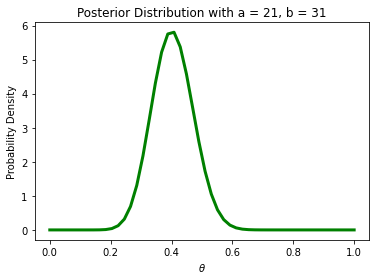

In [2]:
p = np.linspace(0, 1, 50) # possible probability values
a = 20+1
b = 30+1
plt.plot(p, stats.beta.pdf(p, a, b),'g-', lw=3, label='beta pdf')
plt.title('Posterior Distribution with a = 21, b = 31')
plt.xlabel('$\\theta$')
plt.ylabel('Probability Density')

<h2 style="color:Green;">Problem 2: Selecting Asset Pairs with Hedge Ratio</h2>

Seeing the impactful work that you are doing, a portfolio manager approaches you and asks for your recommendation of two assets with a positive hedge ratio to add to his portfolio. Notice that any two assets can be selected, and not just stocks. For example, cryptocurrency and foreign exchange instruments can be suggested as well. Some relatively new cryptocurrencies (e.g., Solana, USD Coin) only have complete data dating back to three or four years ago, so setting the duration of data further back than these dates may result in inaccurate representation of their relationships. (Hint: remember that hedge ratio is equivalent to the regression coefficient)

a) Please specify your asset tickers and their data duration here. Why did you select the two assets?

In [3]:
PAIR = ['Meta','PGY'] # Enter the two assets' symbols here
TAU = 5       # duration span (in years) of observed data

Feel free to change up the asset pair as many times as you need, then re-run the following code chunks to test the hedge ratios between different pairs of assets. Stop until you find one that has a positive hedge ratio. (Hint: you don't have to calculate the exact hedge ratio, just use the scatter plot as help)
<p style="color:red;">PLEASE DO NOT CHANGE THIS CODE CHUNK!!!</p>

C:\Users\Jessica\AppData\Local\Temp\ipykernel_16952\275968120.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([str(p.year) for p in assetLogRet[::len(assetLogRet)//10].index]);


<AxesSubplot:xlabel='Meta', ylabel='PGY'>

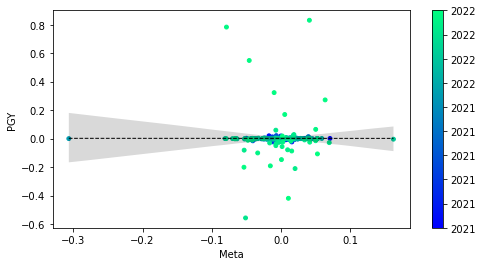

In [4]:
START_DATE = (datetime.today() - timedelta(days = TAU * 365)).strftime('%Y-%m-%d') # data start date
END_DATE = datetime.today().strftime('%Y-%m-%d') # data end date
assetPx = pdr.DataReader(PAIR, 'yahoo', START_DATE, END_DATE)['Adj Close'] # retreiving asset price data from yahoo finance
# converting prices to log returns and removing NaN values
assetLogRet = np.log(assetPx).diff().dropna()
# Visualizing scatter plot (with simple regression line) to demonstrate the relaaaationship between the asset pairs
fig, axes= plt.subplots(figsize=(8,4), ncols=1)
points = axes.scatter(assetLogRet[PAIR[0]],
                         assetLogRet[PAIR[1]],
                         c=np.linspace(0.1, 1, len(assetLogRet)), 
                         s=15, 
                         cmap='winter')
cbar = plt.colorbar(points)
cbar.ax.set_yticklabels([str(p.year) for p in assetLogRet[::len(assetLogRet)//10].index]);
sns.regplot(x=PAIR[0], y=PAIR[1], 
            data=assetLogRet, 
            scatter=False, 
            color='k',
            line_kws={'lw':1, 
                      'ls':'--'})

b) Please describe the hedge ratio between the two assets (i.e., are their strong, moderate, or weak?)

The two assets have a weak hedge ratio because there's about 40% of times that the slope is positive (and thus hedge ratio is 0) but on the other hand is bounded by a negative slope around 0.75. It isn't a particular good hedge above 1 and it is relatively a bad hedge because it also has around a half of 0 hedge ratios.